#    One-class SVM with non-linear kernel (RBF)

An example using a one-class SVM for novelty detection.

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

First, data is modelled and the algorithm is trained. Then when new data are encountered their position relative to the “normal” data (or inliers) from training can be used to determine whether it is “out of class” or not — in other words, whether it is unusual or not.

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Automatically created module for IPython interactive environment


### Generate train data

In [27]:
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

### Generate some regular novel observations to Test

In [28]:
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

### Generate some abnormal novel observations (Outliers)

In [15]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

### Fit and train the model
The parameters for the OneClassSVM the model is using are:
<br>
<br>
- Kernel as rbf 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>exp</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mo>&#x2212;</mo>
  <mi>&#x3B3;</mi>
  <mo data-mjx-texclass="ORD">&#x2225;</mo>
  <mi>x</mi>
  <mo>&#x2212;</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <msup>
    <mo data-mjx-texclass="ORD">&#x2225;</mo>
    <mn>2</mn>
  </msup>
  <mo stretchy="false">)</mo>
</math>
where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3B3;</mi>
</math> is specified by parameter gamma, must be greater than 0.
<br>
- <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3B3;</mi>
</math> = 0.1
<br>
- Nu=0.1
<br>
<br>
Once the class has the initial parameters, We train the model with the X_train values we created previously.
<br>
Then we can predict and measure the accuracy of the model by getting the errors in each set of predictions (Train/Test/Outliers)


In [15]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

### Plot the line, the points, and the nearest vectors to the plane

The model has already the accuracy of each prediction, so we proceed to plot the original observations (train/test/outliers) and the area the model took to be trained.

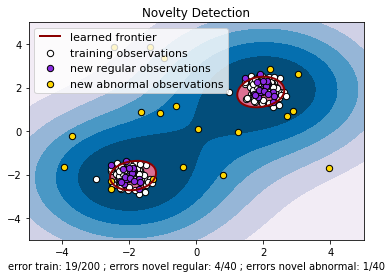

In [29]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()